## Loading Packages

In [1]:
# Data Processing
import numpy as np
import pandas as pd
from collections import Counter

# Importing tde
import tde

# Visualization
import matplotlib.pyplot as plt

# Model and Performance
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report #for model performance evaluation

# To generate the for loops
import glob

In [2]:
## READING MICE DATA
mice = pd.read_excel('/Users/yoddmena/Downloads/Research/Telemetry_edited/Ex 01 - 05_06_19 - Edited.xlsx')
mice.head()

,Minutes,Date,Time,B6-100 Exp. 1 MRSA Deg. C Data,B6-100 Exp. 1 MRSA Cnts Data,B6-101 Exp. 1 MRSA Deg. C Data,B6-101 Exp. 1 MRSA Cnts Data,CC002-557 Exp. 1 MRSA Deg. C Data,CC002-557 Exp. 1 MRSA Cnts Data,CC002-558 Exp. 1 MRSA Deg. C Data,...,CC015-392 Exp. 1 MRSA Deg. C Data,CC015-392 Exp. 1 MRSA Cnts Data,CC038-582 Exp. 1 MRSA Deg. C Data,CC038-582 Exp. 1 MRSA Cnts Data,CC038-583 Exp. 1 MRSA Deg. C Data,CC038-583 Exp. 1 MRSA Cnts Data,CC051-495 Exp. 1 MRSA Deg. C Data,CC051-495 Exp. 1 MRSA Cnts Data,CC051-496 Exp. 1 MRSA Deg. C Data,CC051-496 Exp. 1 MRSA Cnts Data
0,1,2019-04-26,13:10:47,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
1,2,2019-04-26,13:11:47,NaN,69.0,NaN,19.0,NaN,37.0,NaN,...,NaN,77.0,NaN,38.0,NaN,39.0,NaN,74.0,NaN,31.0
2,3,2019-04-26,13:12:47,37.54,8.0,37.82,46.0,37.50,60.0,37.79,...,39.34,64.0,38.80,42.0,38.37,67.0,38.16,39.0,38.02,19.0
3,4,2019-04-26,13:13:47,37.56,0.0,37.74,35.0,37.64,18.0,37.78,...,39.35,48.0,38.76,26.0,38.31,22.0,38.18,38.0,38.10,47.0
4,5,2019-04-26,13:14:47,37.50,0.0,37.74,62.0,37.77,13.0,37.72,...,39.36,20.0,38.59,15.0,38.25,23.0,38.16,45.0,38.14,34.0


In [3]:
#Slicing the df to only get the temperature of each mice
#We want to do this so we can create a loop

mice_temp = mice.iloc[:,3::2] 
mice_temp.head()

,B6-100 Exp. 1 MRSA Deg. C Data,B6-101 Exp. 1 MRSA Deg. C Data,CC002-557 Exp. 1 MRSA Deg. C Data,CC002-558 Exp. 1 MRSA Deg. C Data,CC002-559 Exp. 1 MRSA Deg. C Data,CC015-390 Exp. 1 MRSA Deg. C Data,CC015-391 Exp. 1 MRSA Deg. C Data,CC015-392 Exp. 1 MRSA Deg. C Data,CC038-582 Exp. 1 MRSA Deg. C Data,CC038-583 Exp. 1 MRSA Deg. C Data,CC051-495 Exp. 1 MRSA Deg. C Data,CC051-496 Exp. 1 MRSA Deg. C Data
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,37.54,37.82,37.50,37.79,38.21,38.49,38.05,39.34,38.80,38.37,38.16,38.02
3,37.56,37.74,37.64,37.78,38.15,38.49,38.05,39.35,38.76,38.31,38.18,38.10
4,37.50,37.74,37.77,37.72,38.13,38.44,38.01,39.36,38.59,38.25,38.16,38.14


## Identifying Missing Values

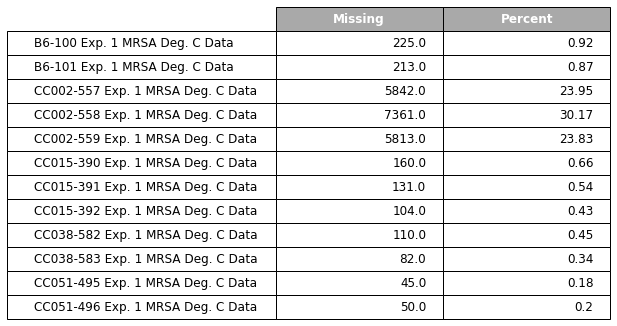

In [38]:
# What percent of values are missing
percent = round(mice_temp.isna().mean()*100, 2)
df_percent = pd.DataFrame(percent)

# How much of the data is missing
amount = mice_temp.isna().sum()
df_amount = pd.DataFrame(amount)

# Combing data frames
combined_df = pd.concat([df_amount, df_percent], axis=1)
# Set column labels
combined_df.columns = ['Missing', 'Percent']
combined_df

# Saving the Table
# Create a table visualization using matplotlib
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('off')
table = ax.table(cellText=combined_df.values, colLabels=combined_df.columns, rowLabels=combined_df.index, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)  # Adjust the scaling factor as per your requirements

# Modify the column names as dark color boxes
for i, col_name in enumerate(combined_df.columns):
    cell = table[0, i]
    cell.set_text_props(weight='bold', color='white')
    cell.set_facecolor('darkgray')
    
# Save the table as an image file
plt.savefig('table_percentage.png', bbox_inches='tight', facecolor='white')

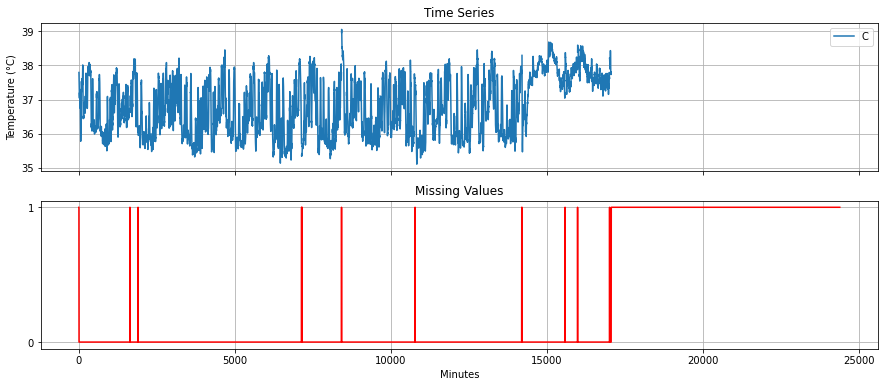

In [39]:
# Plotting the time series and identifying the missing values
fig,ax = plt.subplots(2,1,figsize=(15,6), sharex=True)

ax[0].plot(mice['Minutes'], mice_temp['CC002-558 Exp. 1 MRSA Deg. C Data'])
ax[0].set_title("Time Series")
ax[0].grid()
ax[0].set_ylabel('Temperature (°C)')
ax[0].legend('CC002-558 Exp. 1 MRSA Deg. C Data')

found = mice_temp['CC002-558 Exp. 1 MRSA Deg. C Data'].isna() # finding the missing values

ax[1].plot(mice['Minutes'],found,color="red")
ax[1].set_title("Missing Values")
ax[1].grid()
ax[1].set_xlabel('Minutes')
ax[1].set_yticks([0, 1])
plt.savefig('missing_values.png', bbox_inches='tight', facecolor='white')

This is showing the missing values in the time series. It is important to visualize where the missing values are located since it will give us a better understanding of why there are many values missing. In this case the data that is missing indicates that the mouse had died while their temperature was still recorded. This might be the case for many mice in the data frame. 

## Filling Missing Values

In [9]:
b=0
e=100

<AxesSubplot:title={'center':'CC002-557 Exp. 1 MRSA Deg. C Data'}>

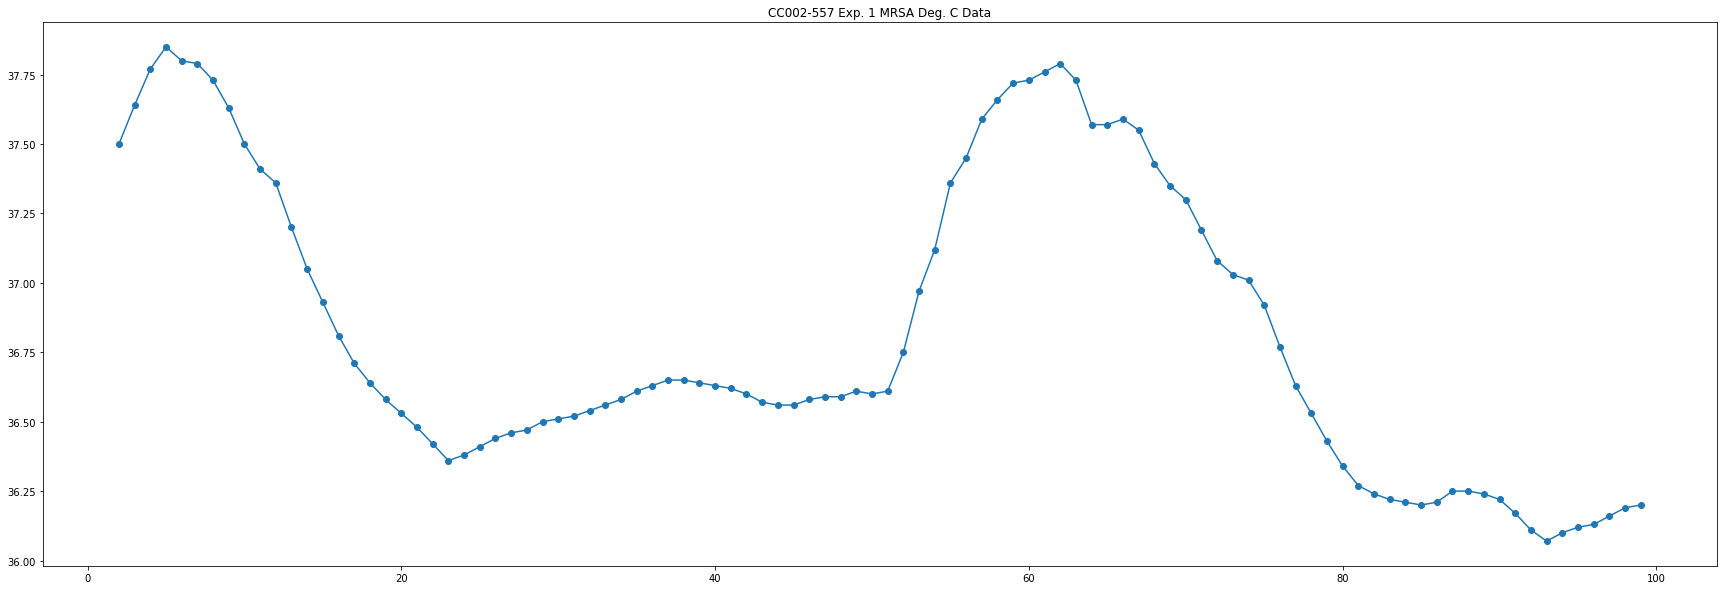

In [10]:
mice_temp["CC002-557 Exp. 1 MRSA Deg. C Data"][b:e].plot(title="CC002-557 Exp. 1 MRSA Deg. C Data", marker="o", figsize=(30,10))

In [11]:
# Backward fill imputation 
b_mice_temp = mice_temp['CC002-557 Exp. 1 MRSA Deg. C Data'].fillna(method="bfill")
b_mice_temp

0        37.50
1        37.50
2        37.50
3        37.64
4        37.77
         ...  
24390      NaN
24391      NaN
24392      NaN
24393      NaN
24394      NaN
Name: CC002-557 Exp. 1 MRSA Deg. C Data, Length: 24395, dtype: float64

<AxesSubplot:title={'center':'CC002-557 Exp. 1 MRSA Deg. C Data'}>

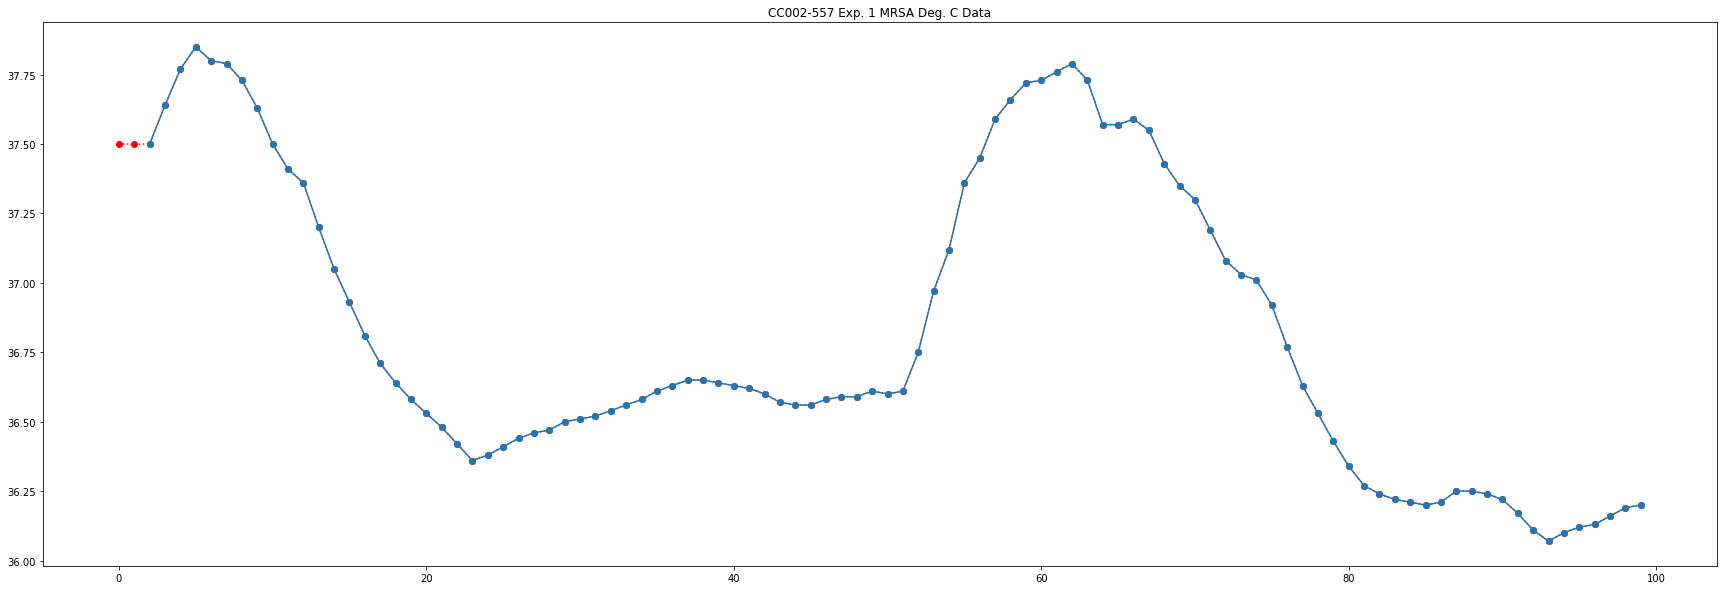

In [12]:
# Backward fill plot (first step)
b_mice_temp[b:e].plot(color="red", marker="o", linestyle="dotted", figsize=(30,10))
mice_temp["CC002-557 Exp. 1 MRSA Deg. C Data"][b:e].plot(title="CC002-557 Exp. 1 MRSA Deg. C Data", marker="o")

In [13]:
# Forward fill imputation (second step)
f_mice_temp = b_mice_temp.fillna(method='ffill')
f_mice_temp

0        37.50
1        37.50
2        37.50
3        37.64
4        37.77
         ...  
24390    37.66
24391    37.66
24392    37.66
24393    37.66
24394    37.66
Name: CC002-557 Exp. 1 MRSA Deg. C Data, Length: 24395, dtype: float64

<AxesSubplot:title={'center':'CC002-557 Exp. 1 MRSA Deg. C Data'}>

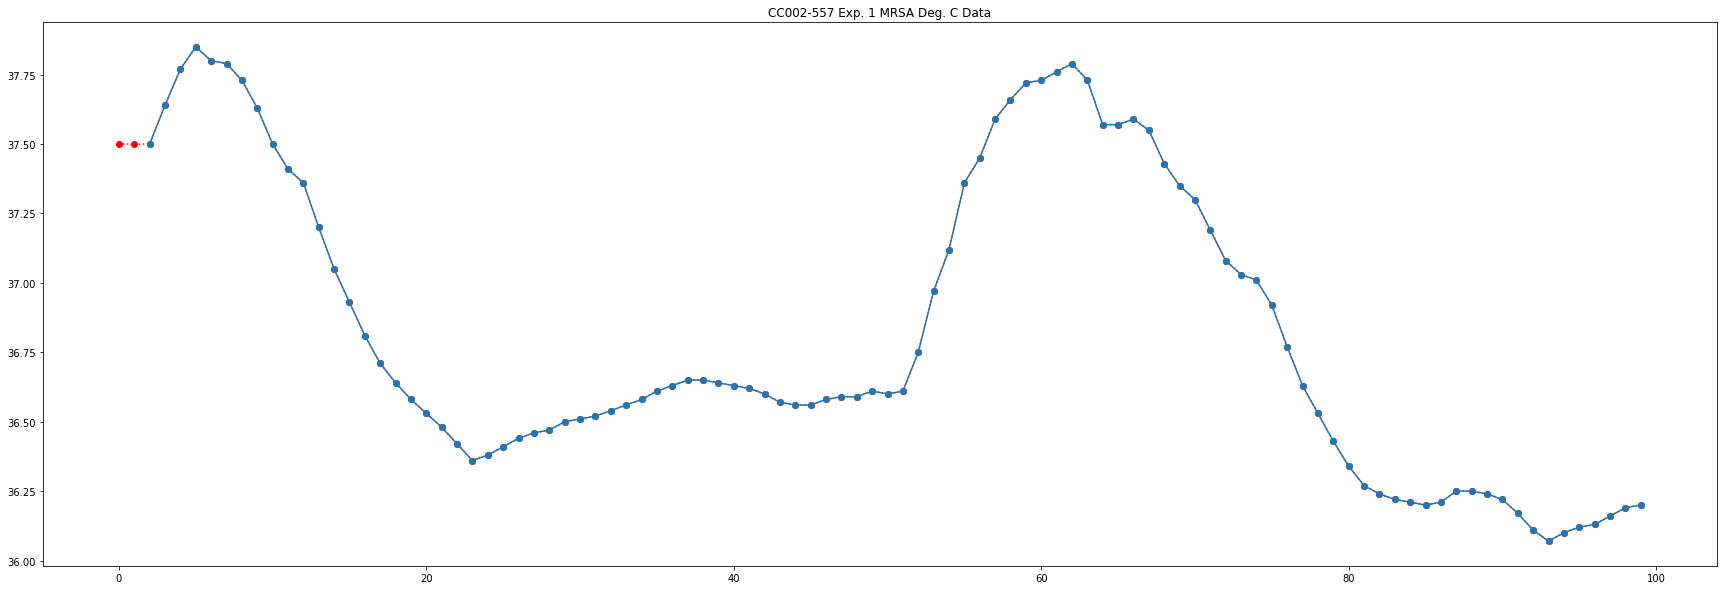

In [14]:
# Forward fill plot
f_mice_temp[b:e].plot(color="red", marker="o", linestyle="dotted", figsize=(30,10))
mice_temp["CC002-557 Exp. 1 MRSA Deg. C Data"][b:e].plot(title="CC002-557 Exp. 1 MRSA Deg. C Data", marker="o")

## Plotting 

In [15]:
difference= abs(mice_temp['CC002-558 Exp. 1 MRSA Deg. C Data']- f_mice_temp)

Text(0.5, 1.0, 'Difference')

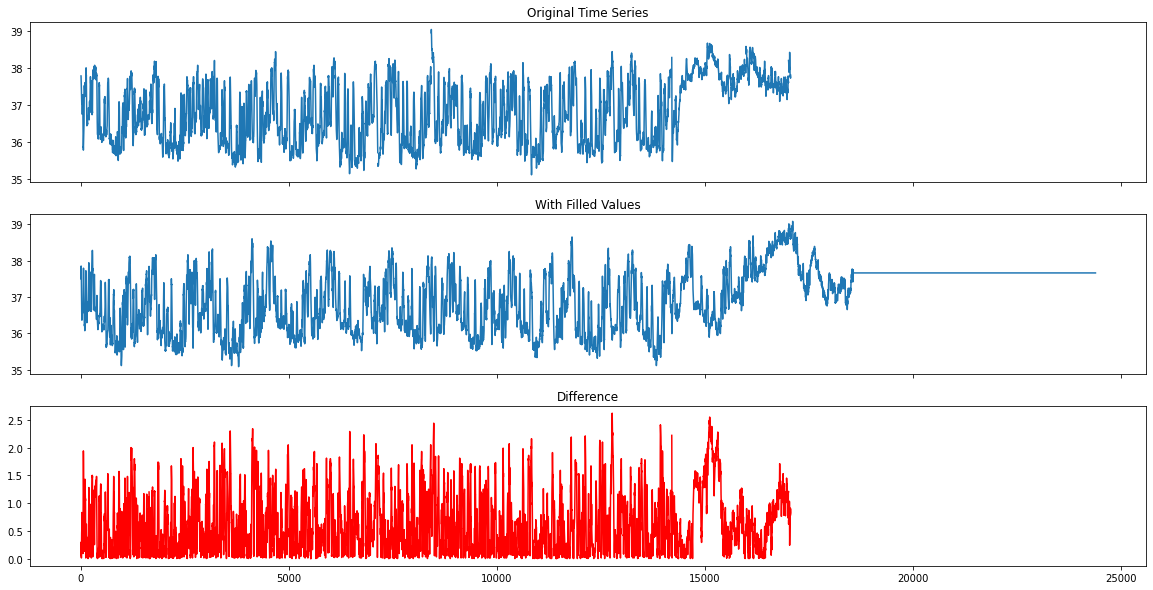

In [16]:
fig,ax = plt.subplots(3,1,figsize=(20,10),sharex=True)
fig.set_facecolor("white")
ax[0].plot(mice['Minutes'],mice_temp['CC002-558 Exp. 1 MRSA Deg. C Data'])
ax[0].set_title("Original Time Series")
ax[1].plot(mice['Minutes'],f_mice_temp)
ax[1].set_title("With Filled Values")
ax[2].plot(mice['Minutes'],difference, color='red')
ax[2].set_title("Difference")


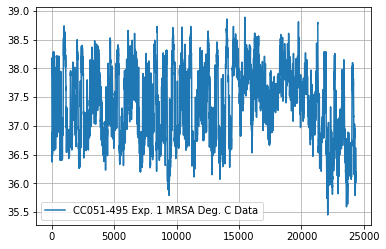

In [32]:
x = mice["Minutes"]
y = mice_temp
#list=list(y.columns)

fig,ax = plt.subplots()

for i in range (0,11):
    #masking the data (getting rid of N/A's)
    #y_col = y.iloc[:,i]
    #mask = y_col.notna()
    #mask = y.notna() # will keep the true values
    #x1 = x[mask]
    ax.cla() # clear axis
    
    y1 = y.iloc[:,i]
    df = pd.DataFrame(y1)
    #Plotting
    #plt.subplot(3, 4, i+1)
    df.plot(ax=ax)
    ax.grid(True)
    suffix = str(i).zfill(4)
    filename = "images/image_01_%s.png"%suffix
    
    fig.savefig(filename, bbox_inches="tight")
    #plt.plot(x1,y1)
    #plt.xlabel("Minutes") #x label
    #plt.ylabel("Temperature (Celsius)") #y label
    #plt.grid()
    #plt.title(str(y[i]))
    #plt.figure(i)

In [ ]:
type(mice_temp)

In [ ]:
mice.columns.values # to verify number of columns that contain degrees